# Import the Library, and Read the File to Dataframe 

In [68]:
# data manipulation library
import pandas as pd
import numpy as np

# data visualization library
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")

# Machine learning library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from xgboost import XGBClassifier

C:\Users\MASTER CORE\AppData\Local\Temp\ipykernel_9792\1607469268.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [69]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Exploratory Data Analysis (EDA)

## Data Understanding

In [70]:
print("train data shape : ", train_df.shape)
print("test data shape : ", test_df.shape)

train data shape :  (891, 12)
test data shape :  (418, 11)


In [71]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [73]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Let's look at the test data

In [74]:
test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [75]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [76]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


from above we could see that test data doesn't have survived columns as in train data, other columns are the same

In [77]:
train_df.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


<> we could see that the ticket contains some duplicate, it's showed by the unique value is 681 instead of 891, it's also less likely to have correlation with survived, because it so random

<> some people also shared cabin, we could see the unique value is only 147

<> the cabin number is so small (contains much missing value). I will try to eliminate this feature.

# Data Preparation

#### Check for the null values

In [78]:
print(f"Train data overview:\n{train_df.isnull().sum()}")
print("")
print(f"Test data overview:\n{test_df.isnull().sum()}")

Train data overview:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Test data overview:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


It looks like that for the training data, Age, Cabin, and Embarked columns have some missing values. For the test data, Age, Fare, and Cabin columns have some missing values. We will work on this missing values later next.

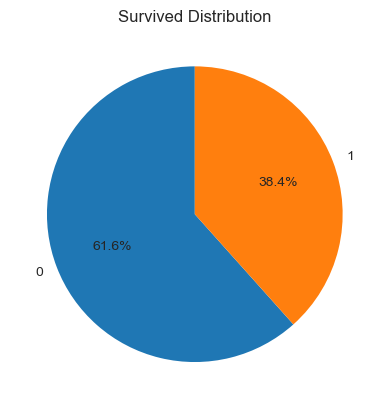

In [79]:
# let's see the big picture, get the distribution of the target data
df_target = train_df["Survived"].value_counts()
plt.pie(df_target,labels=df_target.index, autopct="%1.1f%%", startangle=90)
plt.title("Survived Distribution");

##### from the above pie chart we can see that the there are more people who died than survived. 

In [80]:
# we need passengerId of the test dataset for the submission. so we extract it from the test dataset, before remove it
test_passenger_id = test_df["PassengerId"]
# we drop the PassengerId feature because it almost doesn't give any information
train_df = train_df.drop(columns=["PassengerId"],axis=1)
test_df = test_df.drop(columns=["PassengerId"], axis=1)

In [81]:
def eda_bar_plot(data=train_df, feature=None, target="Survived", normalize=True):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
    
    # the 1st plot is to show the distribution of the feature data
    df1 = data[feature].value_counts(normalize=True)
    df1 = df1.sort_index().reset_index()
    if normalize:
        sns.barplot(data=df1, x="index", y=feature, ax=ax1)
    else:
        sns.barplot(data=df1, x="index", y=feature, ax=ax1)
    
    ax1.set(
        xlabel = feature,
        ylabel = "% for each category",
        title = feature + ": % value counts")
    
    
    # the second plot is to show the relationship between feature and target
    df2 = data.groupby(feature, as_index=False).agg({target : "mean"})
    df2 = df2.sort_values(by=feature)
    sns.barplot(x=feature, y=target, data = df2, ax=ax2)
    ax2.set(
        xlabel = feature,
        ylabel = f"% {target}",
        title = f"{feature}: prob of {target}")
    

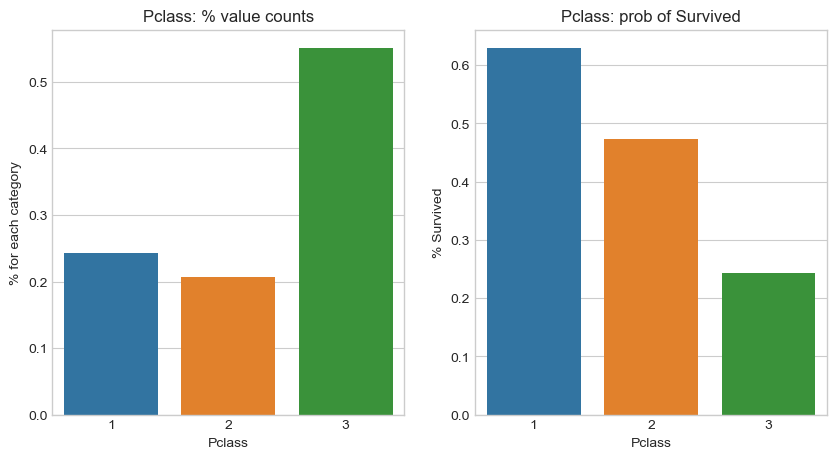

In [82]:
eda_bar_plot(feature="Pclass")

The left plot shows that Pclass not uniformly distrbuted, the 3rd class is more that the other two. on the right plot it shows that the probability of the 1st class to survived is higher than the 2nd class, and the 2nd class higher than the 3rd class. based on this plot we conclude that Pclass feature correlate with survival.

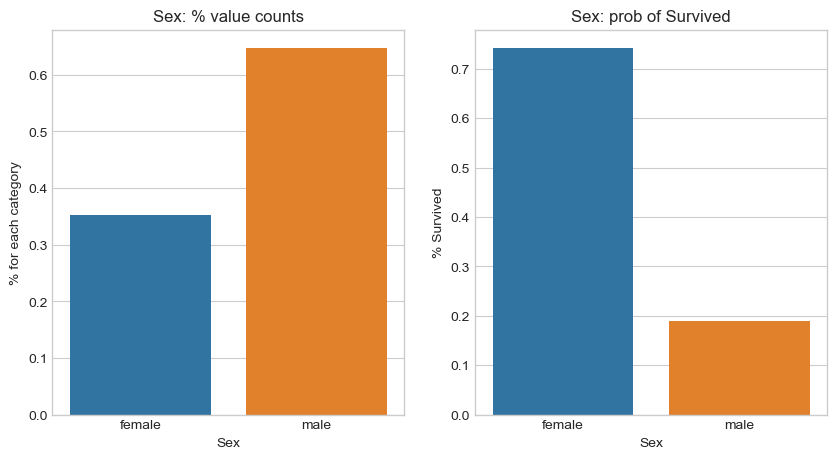

In [83]:
eda_bar_plot(feature="Sex")

The left plot shows that sex not uniformly distrbuted, male is more that female. on the right plot it shows that the probability of female to survived is higher than male. based on this plot we conclude that Sex feature correlate with survival.

In [84]:
# before going further, I would like to remove two of the feature in the data set which is "Cabin" & "Ticket".
# the reason why I did this is because it contains much duplicates or missing value
train_df = train_df.drop(columns=["Cabin", "Ticket"], axis=1)
test_df = test_df.drop(columns=["Cabin", "Ticket"], axis=1)

In [85]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


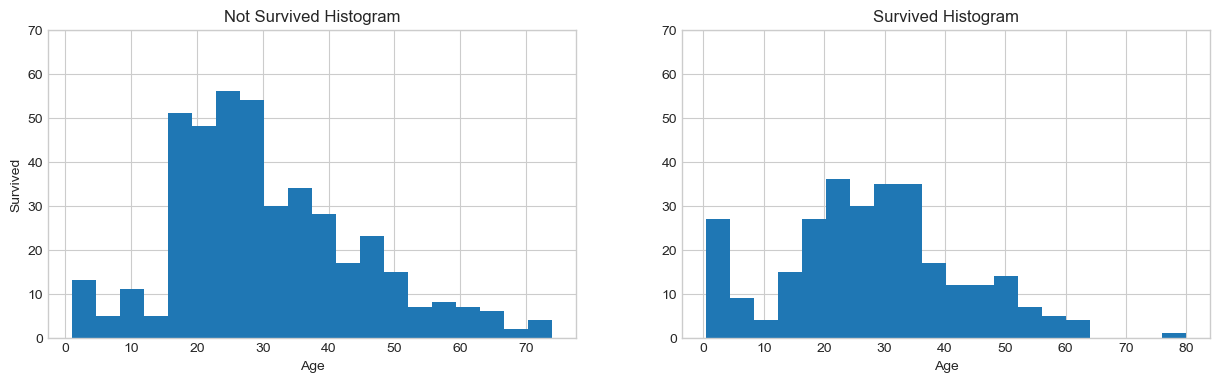

In [86]:
# We already conclude that Sex, and Pclass are included into the feature for the model. let's evaluate another feature.
# Age, we would like to make histogram of age for survived ond not survived.
# histogram for non survived

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))
ax1.hist(data=train_df[train_df["Survived"] == 0], x = "Age", bins=20)
ax1.set(xlabel="Age", ylabel="Survived", title="Not Survived Histogram", ylim=(0,70))
# histogram for survived
ax2.hist(data=train_df[train_df["Survived"] == 1], x = "Age", bins=20)
ax2.set(xlabel="Age", title="Survived Histogram", ylim=(0,70));

from the above we could see that. the rate of survival varied for different ages.

for infant ages < 4 years, the survival rate is high. and for 80 years old the survival rate is high.
but for adult 16 < age < 30, the survival rate quite low.
most of the passenger is adult age 16 to 40

From the above, we could see that the age correlate with survival, even though the it does not correlate linearly, random forest would be good for this classification

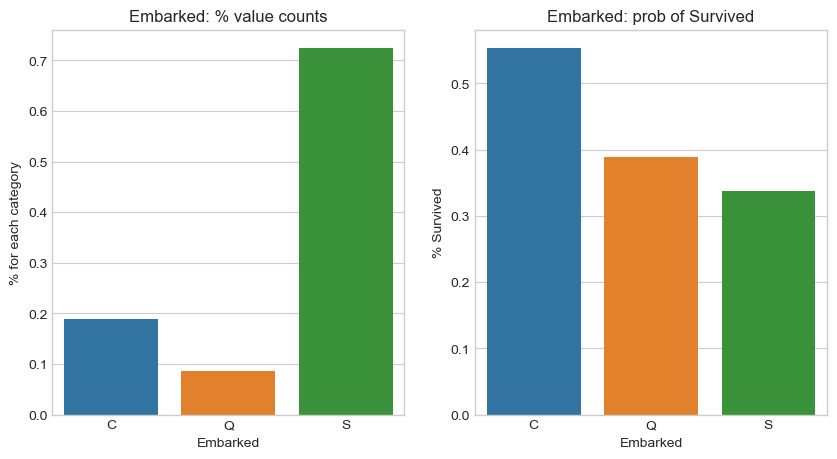

In [87]:
# We try infer something about Embarked feature.
eda_bar_plot(feature="Embarked")

we could see that the rate of survived is C, Q, S in that order. but most of the passenger come form S. so from here we could see that embark have correlation with survival 

In [88]:
# let's now inspect the siblings feature in correlation to survival
train_df["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

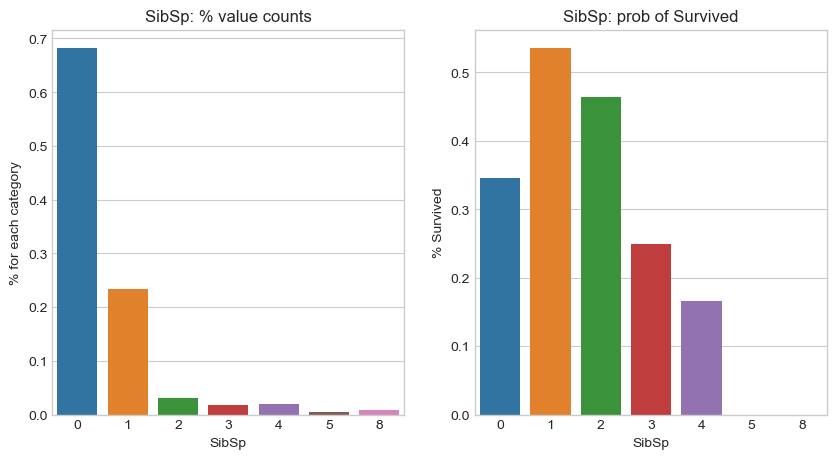

In [89]:
eda_bar_plot(feature="SibSp") 

it looks like our data not distributed really well, too many people having no sibling or spouse aboard and number of Sibsp other than one is really small. also, also at some values the prob is zero. how if we manipulate the data later but let's see another related attribute. parch feature

In [90]:
# let's inspect parch feature
train_df["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

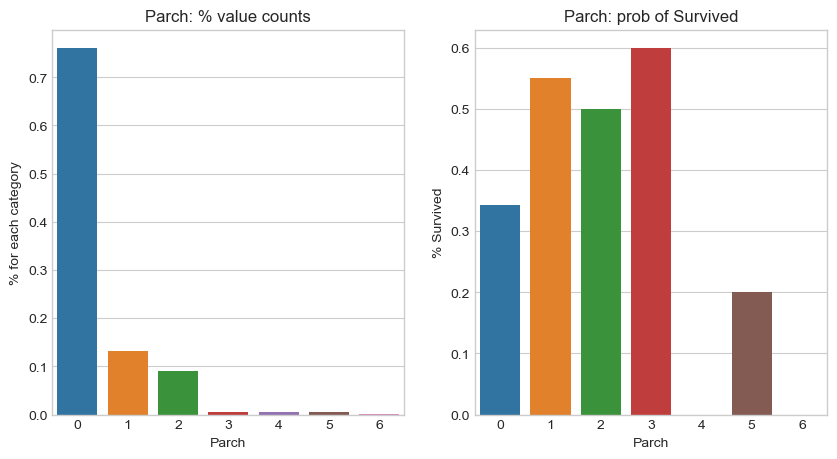

In [91]:
eda_bar_plot(feature="Parch")

basically same as the sibsp feature, parch feature is not distributed well, and the survive probability is nol at some value. and by common sense, we could know that sibsp and parch tell us the same thing, how much relatives they have in that ship. let's create a new feature then that combine both feature and see what we can get. but later after we inspect for another feature.

[Text(0.5, 0, 'Fare'),
 Text(0, 0.5, 'Survived'),
 Text(0.5, 1.0, 'Fare Histogram'),
 (0.0, 70.0)]

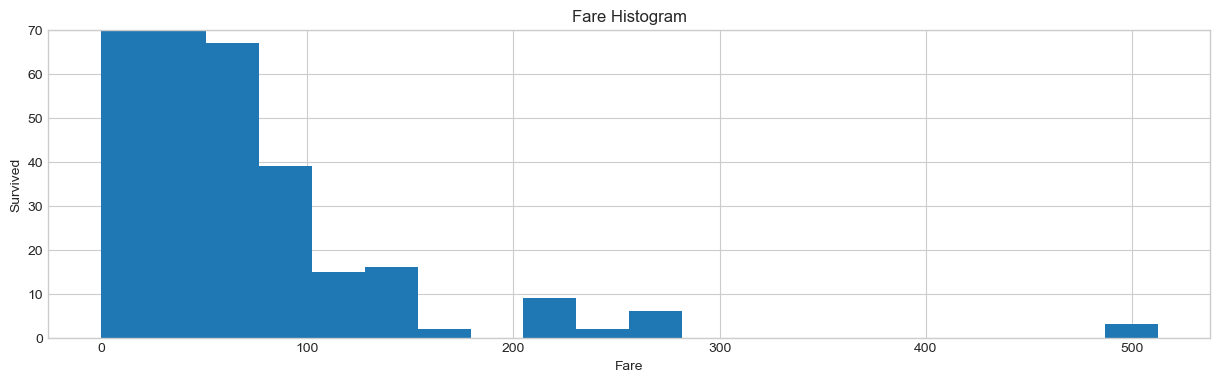

In [92]:
#Let's us see about on fare
fig, ax = plt.subplots(figsize=(15,4))
ax.hist(data=train_df, x = "Fare", bins=20)#, hue="Survived")
ax.set(xlabel="Fare", ylabel="Survived", title="Fare Histogram", ylim=(0,70))

from this we could see that the distribution of Fare is not normal, but before going further let see the relationship of Fare with Survival

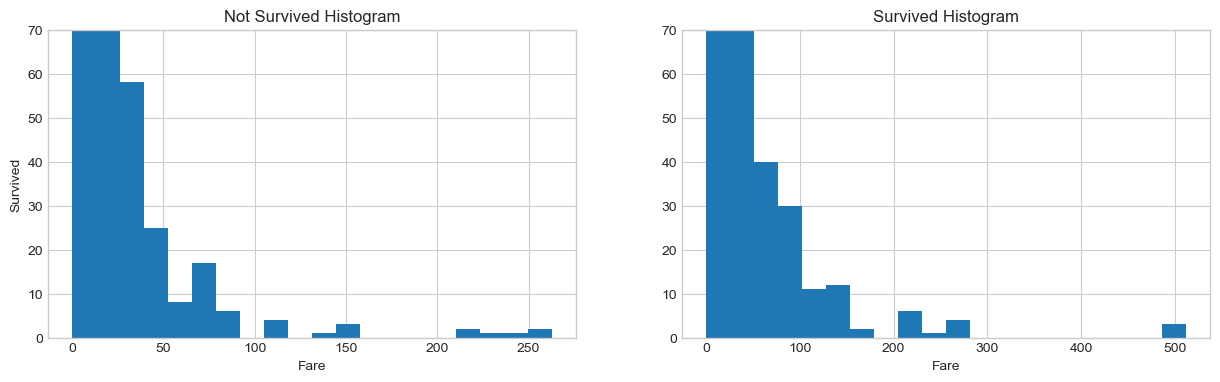

In [93]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))
ax1.hist(data=train_df[train_df["Survived"] == 0], x = "Fare", bins=20)
ax1.set(xlabel="Fare", ylabel="Survived", title="Not Survived Histogram", ylim=(0,70))
# histogram for survived
ax2.hist(data=train_df[train_df["Survived"] == 1], x = "Fare", bins=20)
ax2.set(xlabel="Fare", title="Survived Histogram", ylim=(0,70));

It's hard to see the difference from here. because the distribution is so skew. let's try to normalize the fare by take the log value of it.

[Text(0.5, 0, 'Fare'),
 Text(0, 0.5, 'Survived'),
 Text(0.5, 1.0, 'Not Survived Histogram'),
 (0.0, 70.0)]

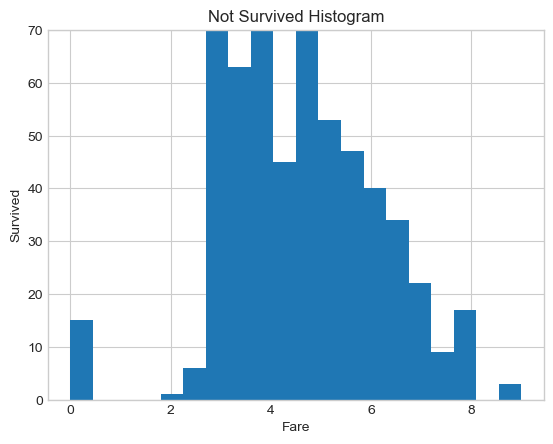

In [94]:
fig, ax1 = plt.subplots(1,1)
ax1.hist(x = train_df["Fare"].apply(lambda x : np.log2(x) if x > 1 else 0), bins=20)
ax1.set(xlabel="Fare", ylabel="Survived", title="Not Survived Histogram", ylim=(0,70))

we already make our fare data normal, then It's time for us to see whether it has some connection to our survival rate

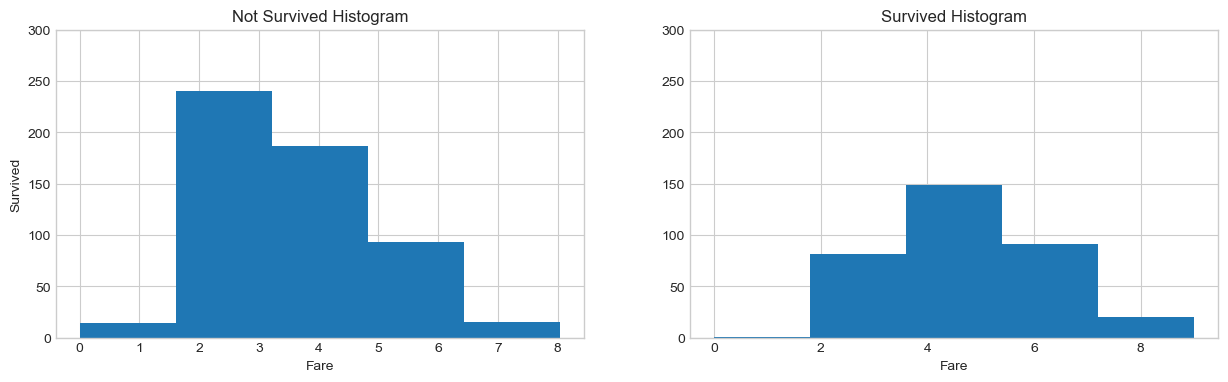

In [95]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))
data_survived = train_df[train_df["Survived"] == 1]
data_not_survived = train_df[train_df["Survived"] == 0]
ax1.hist(x = data_not_survived["Fare"].apply(lambda x : np.log2(x) if x > 1 else 0), bins=5)
ax1.set(xlabel="Fare", ylabel="Survived", title="Not Survived Histogram", ylim=(0,300))
# histogram for survived
ax2.hist(x = data_survived["Fare"].apply(lambda x : np.log2(x) if x > 1 else 0), bins=5)
ax2.set(xlabel="Fare", title="Survived Histogram", ylim=(0,300));

we can see from the above chart, the rate of survived (ratio of survived and not survived increase as the Fare increased). So we can conclude that Fare correlate with survival

let's now looks into the name feature, each people has different name, but we can look at their title. now, let's extract the title from the name and see what it told us

In [96]:
def parsing_name(data=train_df):
    honorific_title = train_df["Name"].map(
        lambda x : x.split(".")[0].split(", ")[-1]
    )
    
    return honorific_title

In [97]:
train_df["honorific_title"] = parsing_name()
train_df[0:5]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,honorific_title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [98]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,honorific_title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


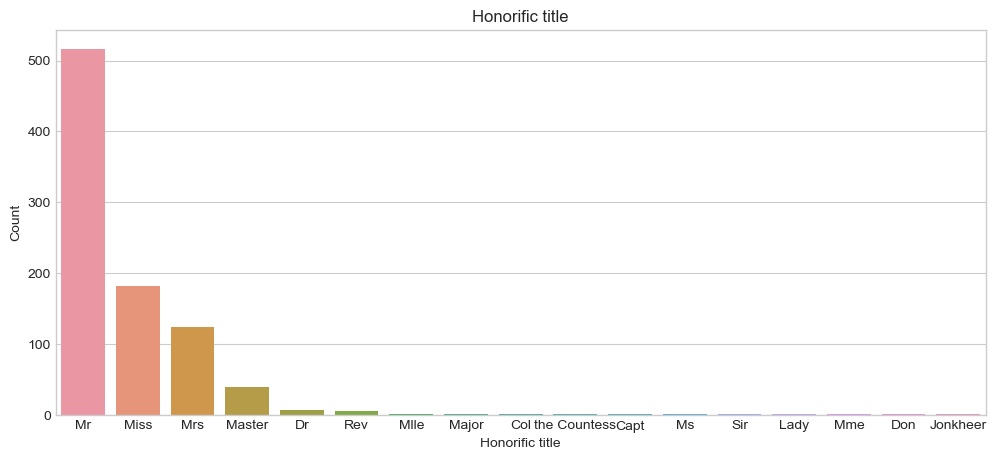

In [99]:
df_name= train_df["honorific_title"].value_counts().reset_index()
df_name
fig, ax = plt.subplots(1, 1, figsize=(12,5))
sns.barplot(df_name, x="index", y="honorific_title", ax=ax)
ax.set(
    xlabel="Honorific title",
    ylabel="Count",
    title ="Honorific title")
plt.show()

from above we can see that there are four major title, and other title is not really much in number, so let's syntesize the rest of the title into other. Ms is equivalent of miss, mme is the french equivalent of mrs. Don is spanish equivalent of Mr. Mlle as french equivalent of miss

In [100]:
top4_titles = {"Mr":"Mr", "Miss": "Miss", "Mrs":"Mrs", "Master":"Mrs", "Ms": "Miss", "Mme": "Mrs", "Don":"Mr", "Mlle": "Miss"}

train_df["honorific_title"] = train_df["honorific_title"].map(
                                                lambda x: top4_titles[x] if x in top4_titles else "Others")
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,honorific_title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,Others
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,Miss
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,Mr


In [101]:
train_df["honorific_title"].value_counts()

Mr        518
Miss      185
Mrs       166
Others     22
Name: honorific_title, dtype: int64

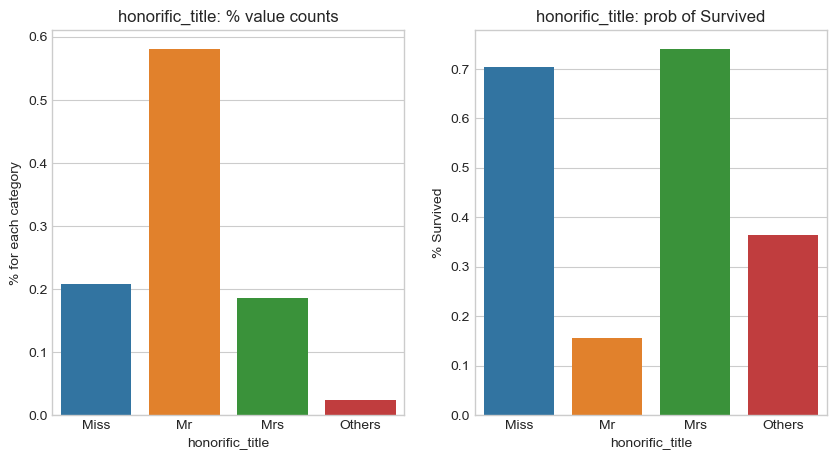

In [102]:
eda_bar_plot(data=train_df, feature="honorific_title")

Now, we have extract the title from the name, now we see that this support the assumption before that women survived more than men. my assumption that name has something to do with ages, let's see

c:\Users\MASTER CORE\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 33.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\MASTER CORE\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 42.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\MASTER CORE\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


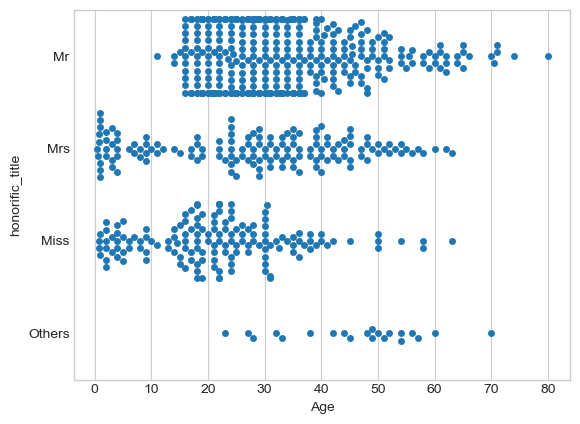

In [103]:
ax = sns.swarmplot(data=train_df, x="Age", y="honorific_title")

We can see from above that title have different range from age. and we can use this as the basis for filling the missing value of age. but we can prove it that it's different by A/B Testing. but for this case, assume that A/B testing reject the null hypotesis and accept that each title has different mean of age.

In [104]:
# we will use the median as the filler, so we have to count the filler
def age_filler():
    train_df1 = train_df[train_df["Age"].notnull()]
    titles = train_df["honorific_title"].unique()
    age_means = []
    for title in titles:
        mean = np.median(train_df1[train_df1["honorific_title"] == title]["Age"])
        age_means.append(mean)
    title_age_predictor = { k:v for (k, v) in zip(titles, age_means)}
    return title_age_predictor

In [105]:
title_age_predictor = age_filler()
title_age_predictor

{'Mr': 30.0, 'Mrs': 29.0, 'Miss': 21.0, 'Others': 49.0}

In [106]:
def fill_age(data):
    datas = data[data["Age"].isnull()]
    for i in datas.index:
        age = title_age_predictor[datas.loc[i, "honorific_title"]]
        data.loc[i, "Age"] = age

In [107]:
# make the honorific title in test data
test_honorific = parsing_name(test_df)
test_df["honorific_title"] = test_honorific.map(lambda x: top4_titles[x] if x in top4_titles else "Others")
test_df


,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,honorific_title
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,Mr
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,Mrs
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,Miss
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,Mrs
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,Mr
...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S,Mr
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,Mr
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,Mrs
416,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S,Mrs


In [108]:
# fill age of the missing data in train and test
fill_age(train_df)
fill_age(test_df)

In [109]:
train_df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,honorific_title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr
5,0,3,"Moran, Mr. James",male,30.0,0,0,8.4583,Q,Mr
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,Mr
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,Mrs
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,Mrs
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,Mrs


In [110]:
test_df.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,honorific_title
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,Mr
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,Mrs
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,Miss
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,Mrs
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,Mr
5,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,9.2250,S,Mr
6,3,"Connolly, Miss. Kate",female,30.0,0,0,7.6292,Q,Mr
7,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,29.0000,S,Mrs
8,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,7.2292,C,Mrs
9,3,"Davies, Mr. John Samuel",male,21.0,2,0,24.1500,S,Mrs


now we already have complete age feature by using honorific title to predict the age, we should eliminate the title to so we don't overfit the model that we would create. We do this because we don't want use 2 feature that one dependent on another. then use both of them as the input feature for the model, its better to take only one that is age. that's the reason why we have to complete it first. time to complete another feature that having missing value.

In [111]:
# I've told you before that we will create new feature based on sibsp and parch feature.
# it's family feature, which tell you the number of family member, someone has with them in the ship
combiner = train_df["SibSp"] + train_df["Parch"]
combiner.value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
dtype: int64

In [112]:
# based on the above we see that, the combiner not equally distributed. 
# but I want to differentiate the passenger who is alone or not alone. 
# so for combiner != 0. I would classify as having family in the ship, no matter how much the number is.

combiner = combiner.apply(lambda x: 0 if x == 0 else 1)
combiner[0:10]

0    1
1    1
2    0
3    1
4    0
5    0
6    0
7    1
8    1
9    1
dtype: int64

In [113]:
train_df["Family"] = combiner
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,honorific_title,Family
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,0


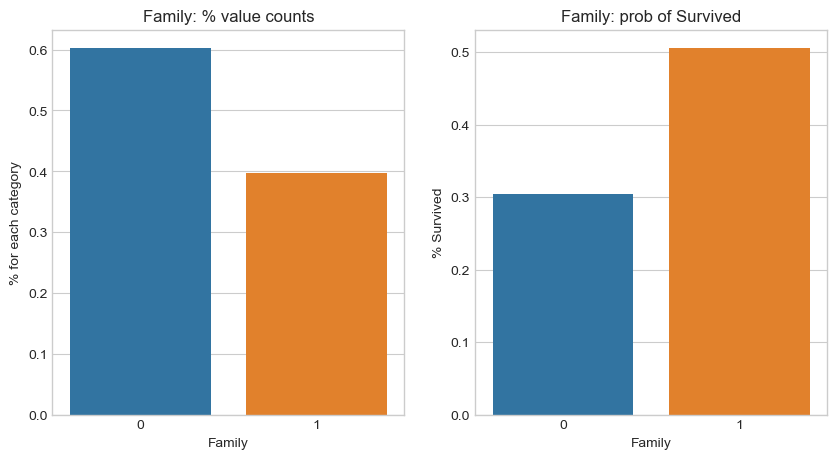

In [114]:
eda_bar_plot(data=train_df, feature="Family")

with these we can the distribution get better, and we can see clearly the difference of the rate of survived. because we already get this feature. it's time to drop parch and sibsp feature from our data 

In [115]:
# create the family feature in test data
test_df["Family"] = (test_df["SibSp"] + test_df["Parch"]).apply(lambda x : 0 if x == 0 else 1)
# drop the sibsp and parch feature in train and test data
test_df = test_df.drop(columns=["SibSp", "Parch"])
train_df = train_df.drop(columns=["SibSp", "Parch"])

now we finish with that feature, let's go on to fill the missing value of another feature. 

In [116]:
print(f"train_data\n{train_df.isnull().sum()}\ntest_data\n{test_df.isnull().sum()}")

train_data
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
Fare               0
Embarked           2
honorific_title    0
Family             0
dtype: int64
test_data
Pclass             0
Name               0
Sex                0
Age                0
Fare               1
Embarked           0
honorific_title    0
Family             0
dtype: int64


In [117]:
# to fill missing value of embarked in train data, we use mode.
# and to fill the missing value of fare in test data, we use mean
freq_port = train_df.Embarked.dropna().mode()[0]
train_df["Embarked"] = train_df["Embarked"].fillna(freq_port)

median_fare = train_df.Fare.dropna().median()
test_df["Fare"].fillna(median_fare, inplace=True)


In [118]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pclass           418 non-null    int64  
 1   Name             418 non-null    object 
 2   Sex              418 non-null    object 
 3   Age              418 non-null    float64
 4   Fare             418 non-null    float64
 5   Embarked         418 non-null    object 
 6   honorific_title  418 non-null    object 
 7   Family           418 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 26.3+ KB


In [119]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         891 non-null    int64  
 1   Pclass           891 non-null    int64  
 2   Name             891 non-null    object 
 3   Sex              891 non-null    object 
 4   Age              891 non-null    float64
 5   Fare             891 non-null    float64
 6   Embarked         891 non-null    object 
 7   honorific_title  891 non-null    object 
 8   Family           891 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 62.8+ KB


Now we already complete the null values. so our data is good. and then try to eliminate the name feature because we already had the honorific feature.

In [120]:
train_df.drop(columns=["Name"], inplace=True)
test_df.drop(columns=["Name"], inplace=True)

we already prepare our data and filter the important ones. but our data contains some categorical value that still name, let's make it in term of one-hot encoding

#### Convert binary categorical data, sex column into a binary code categorical. 1 = man ; 0 = woman.

In [121]:
train_df["Sex"] = train_df["Sex"].astype("category").cat.codes
test_df["Sex"] = test_df["Sex"].astype("category").cat.codes
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,honorific_title,Family
0,0,3,1,22.0,7.2500,S,Mr,1
1,1,1,0,38.0,71.2833,C,Mrs,1
2,1,3,0,26.0,7.9250,S,Miss,0
3,1,1,0,35.0,53.1000,S,Mrs,1
4,0,3,1,35.0,8.0500,S,Mr,0


In [122]:
train_df["Fare"] = train_df["Fare"].apply(lambda x: np.log2(x) if x > 1 else 0)
test_df["Fare"] = test_df["Fare"].apply(lambda x: np.log2(x) if x > 1 else 0)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,honorific_title,Family
0,0,3,1,22.0,2.857981,S,Mr,1
1,1,1,0,38.0,6.155492,C,Mrs,1
2,1,3,0,26.0,2.986411,S,Miss,0
3,1,1,0,35.0,5.730640,S,Mrs,1
4,0,3,1,35.0,3.008989,S,Mr,0


In [123]:
train_df["Pclass"] = pd.Categorical(train_df["Pclass"])
all_dummies_train = pd.get_dummies(train_df[["Pclass", "Embarked", "honorific_title"]])
train_df = pd.concat([train_df, all_dummies_train], axis=1)
train_df.drop(columns=["Pclass", "Embarked", "honorific_title"], inplace=True)

test_df["Pclass"] = pd.Categorical(test_df["Pclass"])
all_dummies_test = pd.get_dummies(test_df[["Pclass", "Embarked", "honorific_title"]])
test_df = pd.concat([test_df, all_dummies_test], axis=1)
test_df.drop(columns=["Pclass", "Embarked", "honorific_title"], inplace=True)
test_df.head()

,Sex,Age,Fare,Family,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,honorific_title_Miss,honorific_title_Mr,honorific_title_Mrs,honorific_title_Others
0,1,34.5,2.968865,0,0,0,1,0,1,0,0,1,0,0
1,0,47.0,2.807355,1,0,0,1,0,0,1,0,0,1,0
2,1,62.0,3.276124,0,0,1,0,0,1,0,1,0,0,0
3,1,27.0,3.114783,0,0,0,1,0,0,1,0,0,1,0
4,0,22.0,3.619120,1,0,0,1,0,0,1,0,1,0,0


In [124]:
train_df.head()

,Survived,Sex,Age,Fare,Family,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,honorific_title_Miss,honorific_title_Mr,honorific_title_Mrs,honorific_title_Others
0,0,1,22.0,2.857981,1,0,0,1,0,0,1,0,1,0,0
1,1,0,38.0,6.155492,1,1,0,0,1,0,0,0,0,1,0
2,1,0,26.0,2.986411,0,0,0,1,0,0,1,1,0,0,0
3,1,0,35.0,5.730640,1,1,0,0,0,0,1,0,0,1,0
4,0,1,35.0,3.008989,0,0,0,1,0,0,1,0,1,0,0


In [125]:
y_train = train_df["Survived"]
X_train = train_df.drop(columns="Survived")

In [126]:
#x_train, x_test, y_train, y_test = train_test_split(X_train, y_train, train_size=0.8, random_state = 1)

In [127]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

NameError: name 'x_train' is not defined

We will try to do prediction by 2 architecture, that is Logistic Regression and RandomForest

### Logistic regression

In [ ]:

# scale = StandardScaler()
# x_train_norm = x_train.copy()
# x_train_norm[["Age", "Fare"]] = scale.fit_transform(x_train[["Age", "Fare"]])
# x_train_norm

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_train)
acc_log_train = round(logreg.score(x_train, y_train) * 100, 2)
#acc_log_cv = round(logreg.score(x_test, y_test) * 100, 2)
print("train accuracy : ", acc_log_train)
#print("cv accuracy : ", acc_log_cv)

train accuracy :  81.59


c:\Users\MASTER CORE\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Random Forest

In [ ]:
random_forest = RandomForestClassifier(n_estimators=40)
random_forest.fit(x_train, y_train)
yhat = random_forest.predict(x_test)
acc_random_forest_train = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest_cv = round(random_forest.score(x_test, y_test) * 100, 2)
print("train accuracy : ", acc_random_forest_train)
print("cv accuracy : ", acc_random_forest_cv)

## XGBoost

In [ ]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
yhat = xgb.predict(x_train)
acc_xgb_train = round(xgb.score(x_train, y_train) * 100, 2)
acc_xgb_cv = round(xgb.score(x_test, y_test) * 100, 2)
print("train accuracy : ", acc_xgb_train)
print("cv accuracy : ", acc_xgb_cv)

In [ ]:
# random_forest prediction (uncomment the comment below if you want to use this method)

# prediction_test = random_forest.predict(test_df)
# resulto = pd.DataFrame({"PassengerId": test_passenger_id.to_numpy(),"Survived": prediction_test})
# resulto[:5]


# logistic regression prediction (uncomment the comment below if you want to use this method)

prediction_test = logreg.predict(test_df)
resulto = pd.DataFrame({"PassengerId": test_passenger_id.to_numpy(),"Survived": prediction_test})
resulto[:5]

# XGBoost prediction (uncomment the comment below if you want to use this method)

# prediction_test = xgb.predict(test_df)
# resulto = pd.DataFrame({"PassengerId": test_passenger_id.to_numpy(),"Survived": prediction_test})
# resulto[:5]

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [ ]:
resulto.to_csv("result_test.csv", index=False)